In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load both sheets into DataFrames
file_path = '/content/FoodImports 1.xlsx'
food_value_df = pd.read_excel(file_path, sheet_name='Food value')
food_volume_df = pd.read_excel(file_path, sheet_name='Food Volume')

In [26]:
# Display the first few rows of each sheet
print("Food Value Sheet Sample:")
print(food_value_df.head())
print("\nFood Volume Sheet Sample:")
print(food_volume_df.head())

Food Value Sheet Sample:
                     Foods            Units     2023     2022     2021  \
0             Beverages 3/  Million dollars  17913.0  18690.1  18549.2   
1      Cocoa and chocolate  Million dollars   6152.4   6048.9   5634.1   
2  Coffee, tea, and spices  Million dollars  11275.6  12979.9   9819.2   
3                    Dairy  Million dollars   3041.4   2706.1   2386.2   
4    Fish and shellfish 2/  Million dollars  24849.3  29475.8  27764.2   

      2020     2019     2018     2017     2016  ...     2008     2007  \
0  16124.0  16033.3  15547.5  14912.8  13982.2  ...  10177.8  10269.8   
1   5051.7   4976.9   4712.3   5011.6   5080.8  ...   3298.8   2661.6   
2   8346.2   8427.3   8454.7   9066.7   8311.3  ...   5580.8   4791.2   
3   2065.6   2128.2   2010.7   1827.4   1873.7  ...   1595.6   1500.8   
4  21284.7  21799.2  22274.0  21326.2  19257.8  ...  13912.0  13434.6   

      2006     2005     2004     2003    2002    2001    2000    1999  
0   9510.4   8206.1

In [27]:
# Check for missing values
print("\nMissing Values in Food Value Data:")
print(food_value_df.isnull().sum())
print("\nMissing Values in Food Volume Data:")
print(food_volume_df.isnull().sum())


Missing Values in Food Value Data:
Foods    0
Units    0
2023     0
2022     0
2021     0
2020     0
2019     0
2018     0
2017     0
2016     0
2015     0
2014     0
2013     0
2012     0
2011     0
2010     0
2009     0
2008     0
2007     0
2006     0
2005     0
2004     0
2003     0
2002     0
2001     0
2000     0
1999     0
dtype: int64

Missing Values in Food Volume Data:
Foods    0
Units    0
2023     0
2022     0
2021     0
2020     0
2019     0
2018     0
2017     0
2016     0
2015     0
2014     0
2013     0
2012     0
2011     0
2010     0
2009     0
2008     0
2007     0
2006     0
2005     0
2004     0
2003     0
2002     0
2001     0
2000     0
1999     0
dtype: int64


In [28]:
# Melt the data to reshape it for easier analysis (Year-wise trends)
food_value_long = food_value_df.melt(id_vars=['Foods', 'Units'],
                                     var_name='Year',
                                     value_name='Value')
food_volume_long = food_volume_df.melt(id_vars=['Foods', 'Units'],
                                       var_name='Year',
                                       value_name='Volume')

In [29]:
# Convert the Year column to numeric for analysis
food_value_long['Year'] = pd.to_numeric(food_value_long['Year'])
food_volume_long['Year'] = pd.to_numeric(food_volume_long['Year'])

# Merge the datasets on Foods, Units, and Year for comparison
merged_data = pd.merge(food_value_long, food_volume_long,
                       on=['Foods', 'Units', 'Year'], how='inner')

In [30]:
# Summary statistics
print("\nSummary Statistics (Value):")
print(food_value_long.describe())
print("\nSummary Statistics (Volume):")
print(food_volume_long.describe())


Summary Statistics (Value):
              Year         Value
count   350.000000    350.000000
mean   2011.000000   7220.554000
std       7.221426   5806.187482
min    1999.000000    670.200000
25%    2005.000000   2592.850000
50%    2011.000000   5380.700000
75%    2017.000000   9952.300000
max    2023.000000  29475.800000

Summary Statistics (Volume):
              Year        Volume
count   350.000000    350.000000
mean   2011.000000   4479.026000
std       7.221426   3834.899811
min    1999.000000    242.700000
25%    2005.000000   1518.025000
50%    2011.000000   2587.650000
75%    2017.000000   7323.400000
max    2023.000000  15206.900000


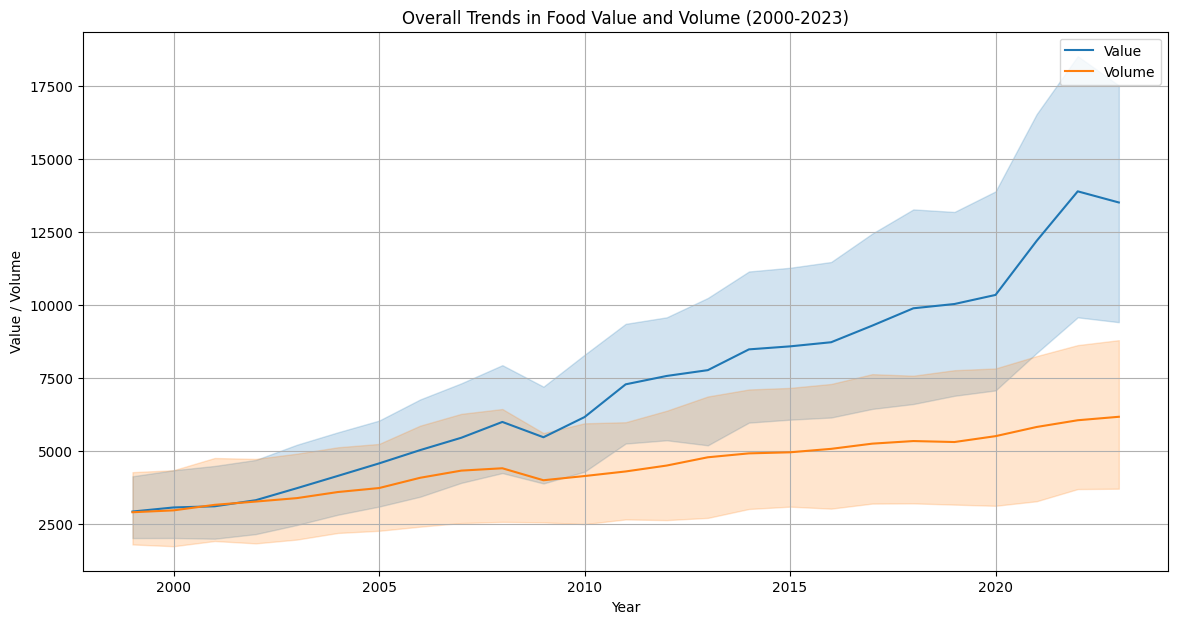

In [31]:
# Visualization 1: Overall Trends in Food Value and Volume Over Years
plt.figure(figsize=(14, 7))
sns.lineplot(data=food_value_long, x='Year', y='Value', label='Value')
sns.lineplot(data=food_volume_long, x='Year', y='Volume', label='Volume')
plt.title("Overall Trends in Food Value and Volume (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Value / Volume")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-32-2daa48b9aca1>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=food_value_long[food_value_long['Foods'].isin(top_5_value)],


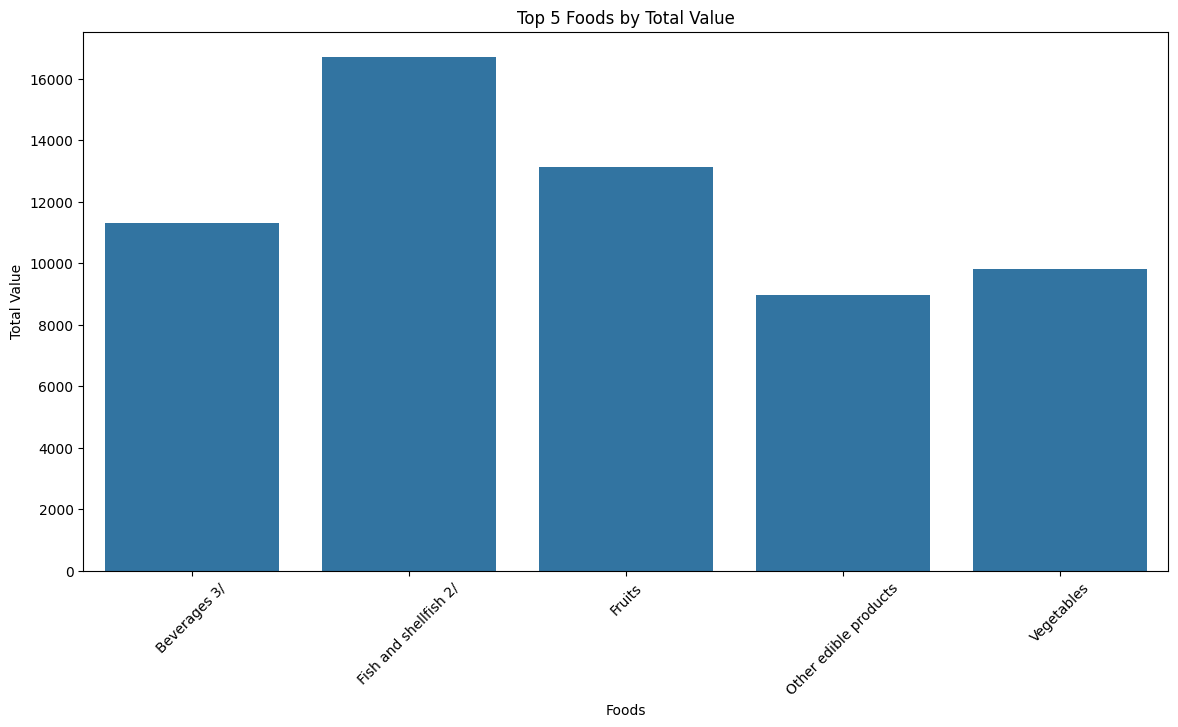

<ipython-input-32-2daa48b9aca1>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=food_volume_long[food_volume_long['Foods'].isin(top_5_volume)],


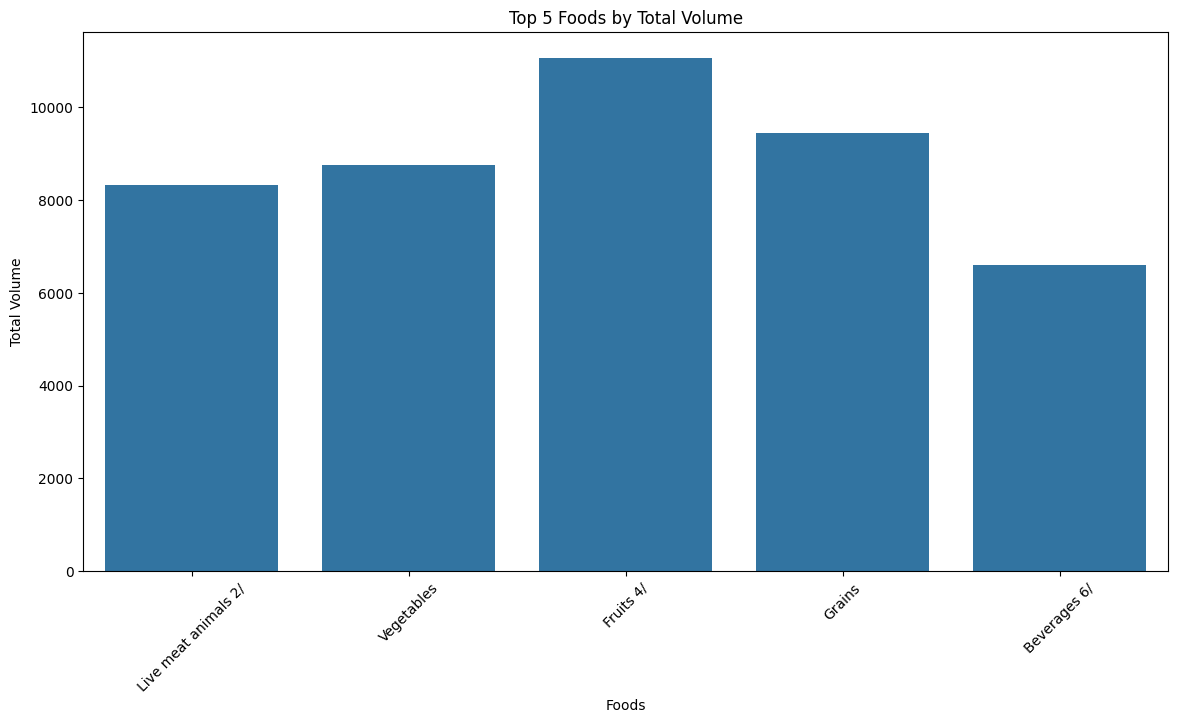

In [32]:
# Visualization 2: Top 5 Foods by Total Value and Volume
top_5_value = food_value_long.groupby('Foods')['Value'].sum().nlargest(5).index
top_5_volume = food_volume_long.groupby('Foods')['Volume'].sum().nlargest(5).index

plt.figure(figsize=(14, 7))
sns.barplot(data=food_value_long[food_value_long['Foods'].isin(top_5_value)],
            x='Foods', y='Value', ci=None)
plt.title("Top 5 Foods by Total Value")
plt.xlabel("Foods")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=food_volume_long[food_volume_long['Foods'].isin(top_5_volume)],
            x='Foods', y='Volume', ci=None)
plt.title("Top 5 Foods by Total Volume")
plt.xlabel("Foods")
plt.ylabel("Total Volume")
plt.xticks(rotation=45)
plt.show()

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Volume' and 'Value' are valid and remove rows with NaN values
regression_data = merged_data[['Volume', 'Value']].dropna()

# Verify if the dataset has enough data
if regression_data.shape[0] > 0:
    # Prepare the data for regression (ensure the data is numerical and valid)
    X = regression_data['Volume'].values.reshape(-1, 1)  # Independent variable
    y = regression_data['Value'].values  # Dependent variable

    # Check for any negative or zero values in 'Volume' or 'Value' that might cause issues
    if (X <= 0).any() or (y <= 0).any():
        print("Warning: There are zero or negative values in 'Volume' or 'Value'. Consider cleaning the data.")

    # Fit the regression model
    model = LinearRegression()
    model.fit(X, y)

    # Get the regression line
    regression_data['Predicted Value'] = model.predict(X)

    # Display regression results
    print(f"Regression Coefficient (Slope): {model.coef_[0]}")
    print(f"Regression Intercept: {model.intercept_}")
    print(f"Model R^2 Score: {model.score(X, y)}")

    # Plot the regression
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Volume', y='Value', data=regression_data, label='Actual Data')
    plt.plot(regression_data['Volume'], regression_data['Predicted Value'], color='red', label='Regression Line')
    plt.title("Regression Analysis: Value vs. Volume")
    plt.xlabel("Volume")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error: No valid data available for regression analysis.")


Error: No valid data available for regression analysis.
